# Librerias

In [421]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import plot_model

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from keras.utils import np_utils

import seaborn as sns
import matplotlib.pyplot as plt
import os

import pygad.kerasga

#Para Paralelizar
from tqdm import tqdm
from multiprocessing.dummy import Pool

import warnings
#PARA ANOVA 1-1
from bioinfokit.analys import stat

warnings.filterwarnings('ignore')

In [316]:
pool = Pool(16)

# Variables GLobales

In [43]:
os.chdir(r"/home/jest/Documents/personal/sistemas inteligentes/proyecto/segunda entrega")
path_name_model = 'dataset/datos_para_modelo.csv'

### 1. Carga Dataset

In [44]:
df = pd.read_csv(path_name_model, sep='|')

### 2. Filtro de dataset

In [45]:
df = df.iloc[:,1:]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526 entries, 0 to 4525
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   estu_genero                   4526 non-null   object 
 1   estu_tieneetnia               4526 non-null   object 
 2   estu_depto_reside             4526 non-null   object 
 3   estu_mcpio_reside             4526 non-null   object 
 4   fami_estratovivienda          4526 non-null   object 
 5   fami_personashogar            4526 non-null   object 
 6   fami_cuartoshogar             4526 non-null   object 
 7   fami_tieneinternet            4526 non-null   object 
 8   fami_tieneserviciotv          4526 non-null   object 
 9   fami_tienecomputador          4526 non-null   object 
 10  fami_tienelavadora            4526 non-null   object 
 11  fami_tienehornomicroogas      4526 non-null   object 
 12  fami_tieneautomovil           4526 non-null   object 
 13  fam

In [47]:
dataset = df.values

### 3. Separación muestra entrenamiento y testing

In [48]:
X = dataset[:, :-1]
y = dataset[:,-1]
X = X.astype(str)
y = y.reshape((len(y), 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3168, 22) (3168, 1)
Test (1358, 22) (1358, 1)


In [49]:
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
oe.fit(X_test)
X_test_enc = oe.transform(X_test)

In [50]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)
y_train_enc = np_utils.to_categorical(y_train_enc)
y_test_enc = np_utils.to_categorical(y_test_enc)

/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 4. Modelo Redes Neuronales

Del primer entregable tenemos que el mejor modelo es
- Mejor modelo: función de activación sigmoide
- 15 épocas
- optimizador de Adam

In [51]:
# modelo de 3 capas (1 oculta)
model = Sequential()
model.add(Dense(64, input_dim=X_train_enc.shape[1], activation='sigmoid', kernel_initializer='he_normal'))
model.add(Dense(16, activation='sigmoid', kernel_initializer='he_normal'))
model.add(Dense(3, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                1472      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 51        
Total params: 2,563
Trainable params: 2,563
Non-trainable params: 0
_________________________________________________________________


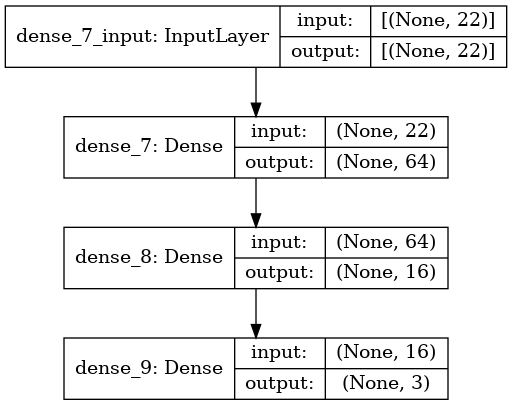

In [53]:
plot_model(model, 
         show_shapes=True, show_layer_names=True)

In [77]:
print('Resultados bajo consideración Primer Ejercicio')
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_enc, y_train_enc, epochs=30, batch_size=16, verbose=2)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy Test: %.2f' % (accuracy*100))

Resultados bajo consideración Primer Ejercicio
Epoch 1/30
198/198 - 0s - loss: 0.1309 - accuracy: 0.9217
Epoch 2/30
198/198 - 0s - loss: 0.1272 - accuracy: 0.9249
Epoch 3/30
198/198 - 0s - loss: 0.1247 - accuracy: 0.9290
Epoch 4/30
198/198 - 0s - loss: 0.1216 - accuracy: 0.9261
Epoch 5/30
198/198 - 0s - loss: 0.1206 - accuracy: 0.9293
Epoch 6/30
198/198 - 0s - loss: 0.1176 - accuracy: 0.9277
Epoch 7/30
198/198 - 0s - loss: 0.1141 - accuracy: 0.9287
Epoch 8/30
198/198 - 0s - loss: 0.1112 - accuracy: 0.9340
Epoch 9/30
198/198 - 0s - loss: 0.1090 - accuracy: 0.9340
Epoch 10/30
198/198 - 0s - loss: 0.1059 - accuracy: 0.9356
Epoch 11/30
198/198 - 0s - loss: 0.1045 - accuracy: 0.9343
Epoch 12/30
198/198 - 0s - loss: 0.1019 - accuracy: 0.9375
Epoch 13/30
198/198 - 0s - loss: 0.1014 - accuracy: 0.9388
Epoch 14/30
198/198 - 0s - loss: 0.0989 - accuracy: 0.9375
Epoch 15/30
198/198 - 0s - loss: 0.0954 - accuracy: 0.9400
Epoch 16/30
198/198 - 0s - loss: 0.0930 - accuracy: 0.9426
Epoch 17/30
198/19

### 5. Implementando factor Genetico

In [54]:
def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    abs_error = mae(data_outputs, predictions).numpy() + 0.00000001
    solution_fitness = 1.0 / abs_error

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))


In [375]:
def grid_ag_manual_model(model, 
                   num_solutions_,
                   data_inputs = X_train_enc,
                   data_outputs = y_train_enc,
                   num_generations = 50,
                   num_parents_mating = 5,
                   parent_selection_type_= 'sss',
                   keep_parents_ = -1,
                   mutation_type_ = 'random'):
    weights_vector = pygad.kerasga.model_weights_as_vector(model=model)
    keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=num_solutions_)
    initial_population = keras_ga.population_weights
    ga_instance = pygad.GA(num_generations=num_generations, 
                           num_parents_mating=num_solutions_, 
                           initial_population=initial_population,
                           parent_selection_type= parent_selection_type_,
                           keep_parents = keep_parents_,
                           mutation_type = mutation_type_,
                           fitness_func=fitness_func,
                           mutation_percent_genes= 'default' if mutation_type_ != 'adaptive' else [0.5, 0.5],
                          # on_generation=callback_generation
                          )
    
    ga_instance.run()
    
    
    return ga_instance

In [317]:
def grid_ag_manual(model, 
                   num_solutions_,
                   data_inputs = X_train_enc,
                   data_outputs = y_train_enc,
                   num_generations = 50,
                   num_parents_mating = 5,
                   parent_selection_type_= 'sss',
                   keep_parents_ = -1,
                   mutation_type_ = 'random'):
    weights_vector = pygad.kerasga.model_weights_as_vector(model=model)
    keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=num_solutions_)
    initial_population = keras_ga.population_weights
    ga_instance = pygad.GA(num_generations=num_generations, 
                           num_parents_mating=num_solutions_, 
                           initial_population=initial_population,
                           parent_selection_type= parent_selection_type_,
                           keep_parents = keep_parents_,
                           mutation_type = mutation_type_,
                           fitness_func=fitness_func,
                           mutation_percent_genes= 'default' if mutation_type_ != 'adaptive' else [0.5, 0.5],
                          # on_generation=callback_generation
                          )
    
    ga_instance.run()
    
    # Returning the details of the best solution.
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    #print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
    #print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))
    
    # Fetch the parameters of the best solution.
    best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
    
    model.set_weights(best_solution_weights)
    predictions = model.predict(data_inputs)
    #print("Predictions : \n", predictions)
    
    # Calculate the categorical crossentropy for the trained model.
    cce = tensorflow.keras.losses.CategoricalCrossentropy()
    #print("Categorical Crossentropy : ", cce(data_outputs, predictions).numpy())

    # Calculate the classification accuracy for the trained model.
    ca = tensorflow.keras.metrics.CategoricalAccuracy()
    ca.update_state(data_outputs, predictions)
    #print(ca.result())
    accuracy = ca.result().numpy()
    #print("Accuracy : ", accuracy)


    return_value = (num_solutions_,
                    num_generations,
                     num_parents_mating,
                     parent_selection_type_,
                     keep_parents_,
                     mutation_type_,
                     solution_fitness, solution_idx, cce(data_outputs, predictions).numpy(), accuracy )
    return return_value

# num_generations
# num_parents_mating
# parent_selection_type
# keep_parents_
# mutation_type
# solution_fitness
# solution_idx
# entriopia
# accuracy



In [318]:
aux = grid_ag_manual(model, 
                   num_solutions_=2,
                   data_inputs = X_train_enc,
                   data_outputs = y_train_enc,
                   num_generations = 200,
                   num_parents_mating = 5,
                   parent_selection_type_= 'tournament',
                   keep_parents_ = -1,
                   mutation_type_ = 'adaptive')
pd.DataFrame(aux).transpose()

,0,1,2,3,4,5,6,7,8,9
0,2,200,5,tournament,-1,adaptive,1.497999,0,1.10133,0.173927


In [428]:
num_solutions = [1,2,5,10]
num_generations = [10,20, 50, 100]
num_parents_mating = [5,8]
parent_selection_type = ['sss', 'rws', 'rank', 'tournament']
keep_parents = [-1,0]
mutation_type_= ['swap', 'inversion', 'scramble', 'adaptive']

In [429]:
print('Numero de experimentos')
len(num_solutions) * len(num_generations) * len(num_parents_mating) * len(parent_selection_type) * len(keep_parents) * len(mutation_type_)

Numero de experimentos


1024

### 6. Corrida de Experimentos

In [321]:
futures = list()

In [322]:
for i in num_solutions:
    for j in num_generations:
        for k in num_parents_mating: 
            for l in parent_selection_type:
                for m in keep_parents:
                    for n in mutation_type_: 
                        futures.append(pool.apply_async(func=grid_ag_manual,
                                                        args= (model, i,X_train_enc,y_train_enc,j,k,l,m,n)))

In [323]:
%%time
df_results =pd.DataFrame()
for future in tqdm(futures):
        try: df_results = df_results.append(pd.DataFrame(future.get()).transpose())
        except: pass

100%|████████████████████████████████████████████| 512/512 [18:11<00:00,  2.13s/it]

CPU times: user 32min 19s, sys: 2min 57s, total: 35min 17s
Wall time: 18min 11s


In [327]:
df_results.columns = ['num_solutions','num_generations', 'num_parents_mating','parent_selection_type',
'keep_parents_',
'mutation_type',
'solution_fitness',
'solution_idx',
'entriopia',
'accuracy']

In [414]:
df_results.head()

,num_solutions,num_generations,num_parents_mating,parent_selection_type,keep_parents_,mutation_type,solution_fitness,solution_idx,entriopia,accuracy
0,1,10,5,sss,-1,swap,1.499082,0,1.169458,0.173927
0,1,10,5,sss,-1,inversion,1.499082,0,1.169458,0.173927
0,1,10,5,sss,-1,scramble,1.499082,0,1.169458,0.173927
0,1,10,5,sss,-1,adaptive,1.499082,0,1.169458,0.173927
0,1,10,5,sss,0,swap,1.63795,0,1.153603,0.221275


In [415]:
df_results.accuracy = pd.to_numeric(df_results.accuracy)

### 7. Analisis de Variables

Text(0.5, 1.0, 'Tipo de selección vs Accuracy')

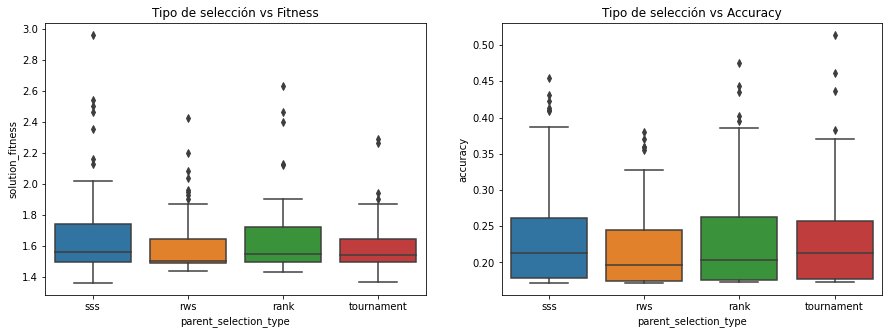

In [359]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(data=df_results, x='parent_selection_type', y='solution_fitness', ax=ax[0]).set_title('Tipo de selección vs Fitness')
sns.boxplot(data=df_results, x='parent_selection_type', y='accuracy', ax=ax[1]).set_title('Tipo de selección vs Accuracy')

In [422]:
print('Analisis ANOVA')
res = stat()
res.tukey_hsd(df=df_results,
              res_var='accuracy', xfac_var='parent_selection_type', anova_model='accuracy ~ C(parent_selection_type)')
res.tukey_summary

Analisis ANOVA


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,sss,rws,0.015011,-0.005329,0.035351,2.690285,0.228451
1,sss,rank,0.001075,-0.019264,0.021415,0.192700,0.900000
2,sss,tournament,0.002871,-0.017469,0.023210,0.514456,0.900000
3,rws,rank,0.013936,-0.006404,0.034275,2.497585,0.291198
4,rws,tournament,0.012140,-0.008199,0.032480,2.175829,0.416615
5,rank,tournament,0.001795,-0.018544,0.022135,0.321756,0.900000


Text(0.5, 1.0, 'Tipo de mutacion vs Accuracy')

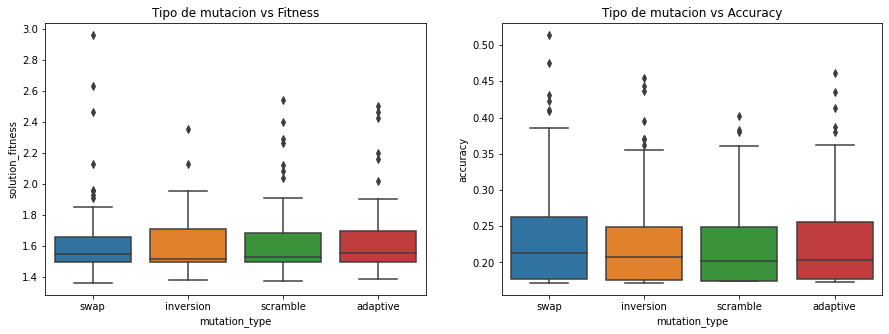

In [424]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(data=df_results, x='mutation_type', y='solution_fitness', ax=ax[0]).set_title('Tipo de mutacion vs Fitness')
sns.boxplot(data=df_results, x='mutation_type', y='accuracy', ax=ax[1]).set_title('Tipo de mutacion vs Accuracy')

In [425]:
print('Analisis ANOVA')
res = stat()
res.tukey_hsd(df=df_results,
              res_var='accuracy', xfac_var='mutation_type', anova_model='accuracy ~ C(mutation_type)')
res.tukey_summary

Analisis ANOVA


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,swap,inversion,0.007198,-0.013165,0.027562,1.288616,0.773911
1,swap,scramble,0.014355,-0.006008,0.034718,2.569727,0.266551
2,swap,adaptive,0.004604,-0.015759,0.024967,0.824202,0.900000
3,inversion,scramble,0.007157,-0.013207,0.027520,1.281111,0.776888
4,inversion,adaptive,0.002594,-0.017769,0.022958,0.464414,0.900000
5,scramble,adaptive,0.009751,-0.010612,0.030114,1.745525,0.592744


Text(0.5, 1.0, 'Número Generaciones vs Accuracy')

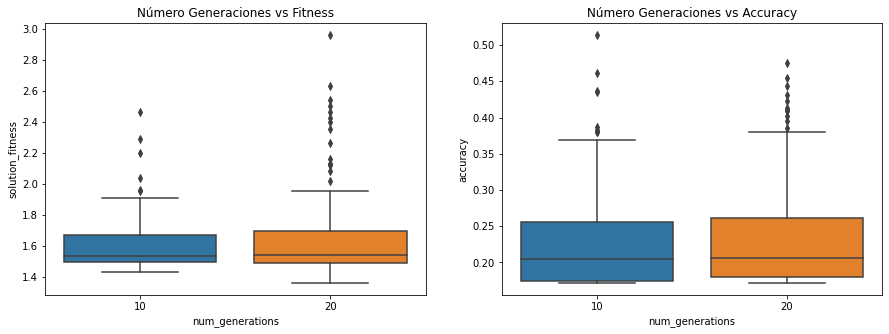

In [426]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(data=df_results, x='num_generations', y='solution_fitness', ax=ax[0]).set_title('Número Generaciones vs Fitness')
sns.boxplot(data=df_results, x='num_generations', y='accuracy', ax=ax[1]).set_title('Número Generaciones vs Accuracy')

In [427]:
print('Analisis ANOVA')
res = stat()
res.tukey_hsd(df=df_results,
              res_var='accuracy', xfac_var='num_generations', anova_model='accuracy ~ C(num_generations)')
res.tukey_summary

Analisis ANOVA


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,10,20,0.003466,-0.00752,0.014452,0.876551,0.540167


### 8. Mejor modelo basado en Accuracy

In [366]:
best_parameters = df_results.sort_values('accuracy', ascending=False).head(1)

In [373]:
best_parameters = best_parameters.loc[0]

In [378]:
best_parameters

num_solutions                     2
num_generations                  10
num_parents_mating                8
parent_selection_type    tournament
keep_parents_                    -1
mutation_type                  swap
solution_fitness           1.551589
solution_idx                      0
entriopia                  1.180081
accuracy                   0.513258
Name: 0, dtype: object

In [376]:
best_model = grid_ag_manual_model(model, 
                   num_solutions_=best_parameters.num_solutions,
                   data_inputs = X_train_enc,
                   data_outputs = y_train_enc,
                   num_generations = best_parameters.num_generations,
                   num_parents_mating = best_parameters.num_parents_mating,
                   parent_selection_type_= best_parameters.parent_selection_type,
                   keep_parents_ = best_parameters.keep_parents_,
                   mutation_type_ = best_parameters.mutation_type)


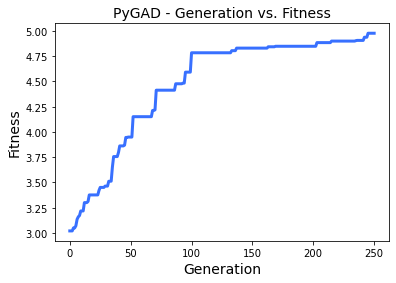

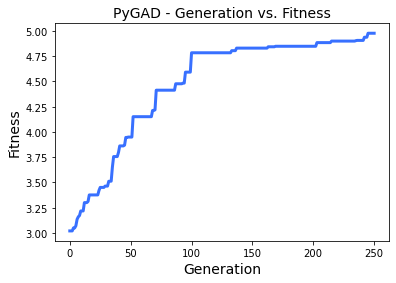

In [377]:
ga_instance.plot_result()

In [379]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()

print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                          weights_vector=solution)

model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions : \n", predictions)

# Calculate the categorical crossentropy for the trained model.
cce = tensorflow.keras.losses.CategoricalCrossentropy()
print("Categorical Crossentropy : ", cce(data_outputs, predictions).numpy())

# Calculate the classification accuracy for the trained model.
ca = tensorflow.keras.metrics.CategoricalAccuracy()
ca.update_state(data_outputs, predictions)
print(ca.result())
accuracy = ca.result().numpy()
print("Accuracy : ", accuracy)


Fitness value of the best solution = 4.977274116274678
Index of the best solution : 0
Predictions : 
 [[1.82867050e-03 5.51190913e-01 2.92944908e-03]
 [2.30905414e-03 1.09175473e-01 9.41902399e-04]
 [1.80345774e-03 1.00853145e-02 9.85890627e-04]
 ...
 [3.91840935e-04 8.71804237e-01 2.14976072e-03]
 [8.53389502e-04 9.42679882e-01 3.13720107e-03]
 [2.71749468e-05 9.44478154e-01 5.17987311e-02]]
Categorical Crossentropy :  1.6970078
tf.Tensor(0.5498737, shape=(), dtype=float32)
Accuracy :  0.5498737
